In [1]:
cd /content/drive/My Drive/graduate_project

/content/drive/My Drive/graduate_project


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
model_position = Sequential()
model_position.add(Conv1D(128, 26, padding='same', input_shape=model_position_shape))
model_position.add(LeakyReLU(0.3))
model_position.add(Conv1D(256, 26, padding='same'))
model_position.add(LeakyReLU(0.3))
model_position.add(Dropout(0.0075))
model_position.add(Flatten())
model_position.add(Dense(128))
model_position.add(LeakyReLU(0.4))
model_position.add(Dense(position_total_data[1].shape[-1], activation='softmax'))

# model load
from keras.models import model_from_json 
json_file = open("model_position_4000_1.json", "r")
loaded_model_json = json_file.read() 
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# model weight load 
model_position.load_weights("model_position_4000_1.h5")
print("Loaded model from disk")

# evaluate
model_position.compile(loss='categorical_crossentropy', optimizer=Adam(0.0000045), metrics=['accuracy'])
t_score = model_position.evaluate(position_total_data[0][training_index], position_total_data[1][training_index],verbose=0)
v_score = model_position.evaluate(position_total_data[0][validation_index], position_total_data[1][validation_index],verbose=0)
m_score = model_position.evaluate(position_total_data[0], position_total_data[1],verbose=0)

print('JC training loss : ' + str(t_score[0]))
print('JC validation loss : ' + str(v_score[0]))
print("")
print('JC training accuracy : ' + str(t_score[1]))
print('JC validation accuracy : ' + str(v_score[1]))
print("")
print('JC total loss : ' + str(m_score[0]))
print('JC total accuracy : ' + str(m_score[1]))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.






Loaded model from disk


JC training loss : 0.2717592625731954
JC validation loss : 0.28985131700850014

JC training accuracy : 0.8698320414976864
JC validation accuracy : 0.868675995694295

JC total loss : 0.27466385068692645
JC total accuracy : 0.8748051138135329


In [0]:
model_all_feature = Sequential()
model_all_feature.add(Conv1D(128, 26, padding='same', input_shape=model_all_feature_shape))
model_all_feature.add(LeakyReLU(0.3))
model_all_feature.add(Conv1D(256, 26, padding='same'))
model_all_feature.add(LeakyReLU(0.3))
model_all_feature.add(Dropout(0.0075))
model_all_feature.add(Flatten())
model_all_feature.add(Dense(128))
model_all_feature.add(LeakyReLU(0.4))
model_all_feature.add(Dense(position_total_data[1].shape[-1], activation='softmax'))

# model load
from keras.models import model_from_json 
json_file = open("model_all_feature_4000.json", "r")
loaded_model_json = json_file.read() 
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# model weight load 
model_all_feature.load_weights("model_all_feature_4000.h5")
print("Loaded model from disk")

# evaluate
model_all_feature.compile(loss='categorical_crossentropy', optimizer=Adam(0.0000045), metrics=['accuracy'])
t_score = model_all_feature.evaluate(all_feature_total_data[0][training_index], all_feature_total_data[1][training_index],verbose=0)
v_score = model_all_feature.evaluate(all_feature_total_data[0][validation_index], all_feature_total_data[1][validation_index],verbose=0)
m_score = model_all_feature.evaluate(all_feature_total_data[0], all_feature_total_data[1],verbose=0)

print('JCS total training loss : ' + str(t_score[0]))
print('JCS total training accuracy : ' + str(t_score[1]))
print("")
print('JCS total validation loss : ' + str(v_score[0]))
print('JCS total validation accuracy : ' + str(v_score[1]))
print("")
print('JCS total loss : ' + str(m_score[0]))
print('JCS total accuracy : ' + str(m_score[1]))

Loaded model from disk
JCS total training loss : 0.25221182879310783
JCS total training accuracy : 0.9751291988123911

JCS total validation loss : 0.22228783711698497
JCS total validation accuracy : 0.9736275565123789

JCS total loss : 0.2530675668903997
JCS total accuracy : 0.9714147286821705


10-fold cross validation

In [0]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
# JC model
model = KerasClassifier(build_fn=model_position, epochs=100, batch_size=10, verbose=0)

kfold_JC_train = KFold(n_splits=10, shuffle=True, random_state=7) 
kfold_JC_train_results = cross_val_score(model , position_total_data[0][training_index], position_total_data[1][training_index], cv=kfold_JC_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: __call__() missing 1 required positional argument: 'inputs'

  FitFailedWarning)


In [2]:
import os
import pandas
import numpy
import random
import copy
import time

import keras.utils.np_utils as np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Dropout
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

from IPython.display import SVG

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

import itertools

import pandas as pd

Using TensorFlow backend.


In [3]:

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

CSV_PATH = r"""/content/drive/My Drive/graduate_project/Jfile"""
folder_list = os.listdir(CSV_PATH)
csv_list = list()



for file_name in folder_list:
    if file_name.split(".")[-1] == 'csv':
        f = open(CSV_PATH + "/" + file_name)
        temp_list = [f.read(), file_name.split(".")[0]]
        csv_list.append(temp_list)



def making_df_faster(csv_file_list, column_index=None, split_idx=1):
    
    if column_index == None:
        # column_index = numpy.arange(len(csv_file_list[0][0].split("\n")[0].split(",")))
        column_index = csv_file_list[0][0].split("\n")[0].split(",")
        column_index_2 = [item.replace('"', "") for item in column_index]
    column_index = numpy.hstack((column_index_2, "class_front", "class_back", 'class_combined'))
    
    result_df = pandas.DataFrame(columns=column_index)
    
    row_count = 0
    
    for csv_idx, csv_file in enumerate(csv_file_list):
        one_file_df = pandas.DataFrame(columns=column_index)
        for idx, line in enumerate(csv_file[0].split("\n")):
            if line != "" and idx != 0:
                one_file_df.loc[idx, one_file_df.columns[0]] = line.split(",")[0].replace('"', "")
                temp_data = numpy.array(line.split(",")[1:]).astype(numpy.float)
                temp_data[temp_data < 0] = 0
                one_file_df.loc[idx, one_file_df.columns[1:-3]] = temp_data
                one_file_df.loc[idx, 'class_front'] = int(csv_file[1].split("f")[0][split_idx:])
                one_file_df.loc[idx, 'class_back'] = int(csv_file[1].split("f")[1])
                one_file_df.loc[idx, 'class_combined'] = csv_file[1].split("f")[0][split_idx:] + "_" + csv_file[1].split("f")[1]
                                                           
                row_count += 1
            if row_count % 100 == 0:
                print(row_count)
        result_df = result_df.append(one_file_df)
        print(csv_idx, "th csv is combined complete \n\n\n\n")
    return result_df.reset_index(drop=True)


def deleting_non_detected_columns(given_df, final_data_type='float32'):
    str_df = given_df
#     str_df = None
#     if given_df.dtypes[1] != 'str':
#         str_df = given_df
#         str_df.loc[:, str_df.columns[1:]] = str_df.loc[:, str_df.columns[1:]].astype('str')
    
#     else:
#         str_df = given_df
    
    target_columns = str_df.describe().loc['unique', ][str_df.describe().loc['unique'] == 1].index
    
    for col in target_columns:
        str_df = str_df.drop(columns=col)
    
    final_df = str_df
    final_df.loc[:, final_df.columns[1:-3]] = final_df.loc[:, final_df.columns[1:-3]].astype(final_data_type)
    return final_df


def deleting_before_camera_set(given_df, desire_type='float32', target_column='class_combined', cutting_idx_rank=5):
    cal_df = given_df
#     cal_df = None
#     if given_df.dtypes[2] != desire_type:
#         cal_df = given_df
#         cal_df.loc[:, cal_df.columns[1:-3]] = cal_df.loc[:, cal_df.columns[1:-3]].astype(desire_type)
    
#     else:
#         cal_df = given_df
        
    final_df = pandas.DataFrame(columns=cal_df.columns)
    
    for cls in set(cal_df.loc[:, target_column]):
        max_value_idx_list = cal_df.loc[cal_df.loc[:, target_column] == cls].loc[:, cal_df.columns[3:-2:3]].astype('float32').idxmax()
        cutting_idx = max_value_idx_list.sort_values()[cutting_idx_rank]
        final_df = final_df.append(cal_df.loc[cal_df.loc[:, target_column] == cls][cutting_idx:])
    
    return final_df


def normalization_df(given_df, freq_threshold=0.2, z_axis_threshold=100):
    cal_df = given_df
    
    cls_list = given_df.columns
    df_analysis = given_df.describe(include=['freq', 'count'])
    
    threshold_col = df_analysis.loc['freq'][df_analysis.loc['freq'] > df_analysis.loc['count'] * freq_threshold]
    threshold_col = threshold_col.index
#     print(threshold_col.index)
    
    z_col = given_df.iloc[0, 1:-3] > z_axis_threshold
    z_col = z_col[z_col].index
    
    for col in threshold_col.to_list():
        cal_df.drop(columns=col)
    for col in z_col.to_list():
        cal_df.loc[:, col] = cal_df.loc[:, col] / cal_df.loc[:, col].max()
        
        
    return cal_df


def normalization_df_ver2(given_df):
    cal_df = given_df 
        
    z_df = cal_df.iloc[:, 3:-3:3]
    z_max = z_df.max()
    
    cal_df.iloc[:, 3:-3:3] = cal_df.iloc[:, 3:-3:3] / z_max
    return cal_df


def chunking_data(given_df, chunking_length=60, class_column_name='class_combined'):
    
    np_list = list()
    
    for cls in set(given_df.loc[:, class_column_name]):
        get_df = given_df[given_df.loc[:, class_column_name] == cls]
        np_list.append(get_df.to_numpy())
        
    chunked_data = list()
    chunked_label = list()
    for data in np_list:
        for idx in range(len(data) - chunking_length):
            chunked_data.append(numpy.array(data[idx:idx + chunking_length, 1:-3]))
            chunked_label.append(int(data[0, -3]))
    
    return numpy.array(chunked_data), np_utils.to_categorical(chunked_label)


def preprocessing(given_df, chk_len=60):
    print("deleting data before camera set")
    cal_df = deleting_before_camera_set(given_df)
    print("deleting data before camera set success\n\n")
    print("deleting undetected data")
    cal_df = deleting_non_detected_columns(cal_df)
    print("deleting undetected data done\n\n")
    print("normalizing data")
    cal_df = normalization_df_ver2(cal_df)
    print("normalizing data done \n\n")
    return chunking_data(cal_df, chk_len), cal_df

def making_df_faster_2(csv_file_list, column_index=None, split_idx=1):
    
    if column_index == None:
        # column_index = numpy.arange(len(csv_file_list[0][0].split("\n")[0].split(",")))
        column_index_2 = [idx + 1 for idx in range(len(csv_file_list[0][0].split("\n")[0].split(",")))]
#         column_index_2 = [item.replace('"', "") for item in column_index]
    column_index = numpy.hstack((column_index_2, "class_front", "class_back", 'class_combined'))
    
    result_df = pandas.DataFrame(columns=column_index)
    
    row_count = 0
    
    for csv_idx, csv_file in enumerate(csv_file_list):
        one_file_df = pandas.DataFrame(columns=column_index)
        for idx, line in enumerate(csv_file[0].split("\n")):
            if line != "" and idx != 0:
                one_file_df.loc[idx, one_file_df.columns[0]] = line.split(",")[0].replace('"', "")
#                 print(one_file_df, "\n" * 10, one_file_df.loc[idx, one_file_df.columns[1:]])
                temp_data = numpy.array(line.split(",")[1:]).astype(numpy.float)
                one_file_df.loc[idx, one_file_df.columns[1:-3]] = temp_data
                one_file_df.loc[idx, 'class_front'] = int(csv_file[1].split("f")[0][split_idx:])
                one_file_df.loc[idx, 'class_back'] = int(csv_file[1].split("f")[1])
                one_file_df.loc[idx, 'class_combined'] = csv_file[1].split("f")[0][split_idx:] + "_" + csv_file[1].split("f")[1]
                                                           
                row_count += 1
            if row_count % 100 == 0:
                print(row_count)
        result_df = result_df.append(one_file_df)
        print(csv_idx, "th csv is combined complete \n\n\n\n")
    return result_df.reset_index(drop=True)


df_faster_version = making_df_faster(csv_list)

# 학부생 데이터
csv_list_2 = list()
CSV_PATH_2 = r"""/content/drive/My Drive/graduate_project/Gfile"""

for file_name in os.listdir(CSV_PATH_2):
    if file_name.split(".")[-1] == 'csv':
        f = open(CSV_PATH_2 + "/" + file_name)
        temp_list = [f.read(), file_name.split(".")[0]]
        csv_list_2.append(temp_list)

        

df_faster_gfile = making_df_faster_2(csv_list_2, split_idx=2)

target_joint = ['shoulder', 'elbow', 'wrist']
joint_name = df_faster_version.columns.to_numpy()

temp_array = list()
for joint in joint_name:
    joint_flag = False
    for target in target_joint:
        if target in joint:
            temp_array.append(True)
            joint_flag = True
    if not joint_flag:
        temp_array.append(False)
        
joint_name[temp_array]

joint_base = list(joint_name[temp_array])
joint_base.extend(joint_name[-3:])

target_df = df_faster_version.loc[:, joint_base]
target_df.iloc[:, 2:-3:3] = target_df.iloc[:, 2:-3:3] / numpy.max(target_df.iloc[:, 2:-3:3].to_numpy())

time_target_df = target_df
np_time = df_faster_version.loc[:, 'time'].to_numpy()
np_time_split = [item.split(":") for item in np_time]
np_time_sum = [3600*int(time[0]) + 60*int(time[1]) + float(time[2]) for time in np_time_split]

# Extracted Joint Coordinates(Left/Right Sho/Elb/Wrist) /Velocity/Acceleration
joint_base = list(joint_name[temp_array])
joint_base.extend(joint_name[-3:])

target_df = df_faster_version.loc[:, joint_base]
target_df.iloc[:, 2:-3:3] = target_df.iloc[:, 2:-3:3] / numpy.max(target_df.iloc[:, 2:-3:3].to_numpy())
# time data 
time_target_df = target_df
np_time = df_faster_version.loc[:, 'time'].to_numpy()
np_time_split = [item.split(":") for item in np_time]
np_time_sum = [3600*int(time[0]) + 60*int(time[1]) + float(time[2]) for time in np_time_split]
time_target_df['time'] = np_time_sum

def calculate_velo_accele(given_df, columns_length=18):
    if 'time' not in list(given_df.columns):
        raise Exception("DataFrame should have 'time' column. Check Dataframe")
    
    class_comb = numpy.unique(given_df.loc[:, 'class_combined'].to_numpy())
    
    cal_np = given_df.to_numpy()
    velo_final_data = list()
    accele_final_data = list()
    position_final_data = list()
    etc_final_data = list()
    
    for idx, cls in enumerate(class_comb):
        temp_data = cal_np[cal_np[:, -2] == cls]
        temp_time = temp_data[1:, -1] - temp_data[:-1, -1]
        final_time = numpy.repeat(temp_time, columns_length).reshape((-1, temp_data.shape[0] - 1, columns_length))
        
        position_data = temp_data[2:, :columns_length]
        etc_data = temp_data[2:, columns_length*3:-1]
        
        velo_data = (temp_data[1:, :columns_length] - temp_data[:-1, :columns_length]) / final_time
        cp_velo = copy.deepcopy(velo_data)
        accele_data = (cp_velo[:, 1:] - cp_velo[:, :-1]) / final_time[0][1:]

        
        velo_final_data.extend(list(velo_data[0][1:]))
        accele_final_data.extend(list(accele_data[0]))
        position_final_data.extend(list(position_data))
        etc_final_data.extend(etc_data)
    temp_sum_data = numpy.hstack((
                                  numpy.array(velo_final_data) / numpy.max(velo_final_data),
                                  numpy.array(accele_final_data) / numpy.max(accele_final_data),
                                  etc_final_data))

    return pandas.DataFrame(temp_sum_data, columns=given_df.columns[columns_length:-1])

# Check Velocity and Acceleration data
calculated_df = calculate_velo_accele(target_df)

# Export from raw data Gfile(학부데이터)
np_df_ver2 = df_faster_gfile.to_numpy()
temp_np = np_df_ver2[np_df_ver2[:, -3] == 10]
temp_np = temp_np[temp_np[:, 0] != '0']
temp_df = pandas.DataFrame(temp_np)
df_faster_gfile.loc[np_df_ver2[:, 0] == temp_np[0][0], :].to_numpy()[0][1:-3]
df_faster_version.loc[df_faster_version.to_numpy()[:, 0] == temp_np[0][0]].to_numpy()[0][62:-3]
target_time_np = df_faster_version.loc[df_faster_version.to_numpy()[:, 0] == temp_np[0][0]].to_numpy()[0]

# Position Data(JC), Velocity, Acceleration 데이터 나누기
position_data = target_df.iloc[:, :18]
velocity_data = target_df.iloc[:, 18:36]
acceleration_data = target_df.iloc[:, 36:]
velocity_data[joint_name[-3:]] = df_faster_version.iloc[:, -3:]
position_data[joint_name[-3:]] = df_faster_version.iloc[:, -3:]
# Chunking data
position_total_data = chunking_data(position_data, 30)
all_feature_total_data = chunking_data(calculated_df, 30)

model_all_feature_shape = all_feature_total_data[0].shape[1:]
random_index = [i for i in range(all_feature_total_data[0].shape[0])]
random.shuffle(random_index)
np_ran_idx = numpy.array(random_index)

training_ratio = 0.5
test_ratio = 0.2

training_index = list(np_ran_idx[:int(np_ran_idx.shape[0] * training_ratio)])
validation_index = list(np_ran_idx[int(np_ran_idx.shape[0] * training_ratio):-int(np_ran_idx.shape[0] * test_ratio)])

# model_position_shape = (1, *position_total_data[0].shape[1:])
model_position_shape = position_total_data[0].shape[1:]

0
0 th csv is combined complete 




100
1 th csv is combined complete 




200
2 th csv is combined complete 




300
3 th csv is combined complete 




400
4 th csv is combined complete 




500
5 th csv is combined complete 




6 th csv is combined complete 




600
7 th csv is combined complete 




700
8 th csv is combined complete 




800
9 th csv is combined complete 




900
10 th csv is combined complete 




1000
11 th csv is combined complete 




1100
12 th csv is combined complete 




1200
13 th csv is combined complete 




1300
14 th csv is combined complete 




15 th csv is combined complete 




1400
1500
16 th csv is combined complete 




1600
17 th csv is combined complete 




18 th csv is combined complete 




1700
19 th csv is combined complete 




1800
20 th csv is combined complete 




1900
21 th csv is combined complete 




2000
22 th csv is combined complete 




2100
23 th csv is combined complete 




2200
24 th csv is combined complete 




25 th c

In [5]:
model_position = Sequential()
model_position.add(Conv1D(128, 26, padding='same', input_shape=model_position_shape))
model_position.add(LeakyReLU(0.3))
model_position.add(Conv1D(256, 26, padding='same'))
model_position.add(LeakyReLU(0.3))
model_position.add(Dropout(0.0075))
model_position.add(Flatten())
model_position.add(Dense(128))
model_position.add(LeakyReLU(0.4))
model_position.add(Dense(position_total_data[1].shape[-1], activation='softmax'))

model_position.compile(loss='categorical_crossentropy', optimizer=Adam(0.0000045), metrics=['accuracy'])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [6]:
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('jc_4000_history_0217.csv', append=True, separator=';')

position_history = model_position.fit(position_total_data[0][training_index], position_total_data[1][training_index],
                                      epochs=4000,
                                      validation_data=(position_total_data[0][validation_index],
                                                       position_total_data[1][validation_index]))

# model save
model_json = model_position.to_json()
with open("model_position_4000_0217.json", "w") as json_file : 
    json_file.write(model_json)
    
# model weight save
model_position.save_weights("model_position_4000_0217.h5")
print("Saved model to disk")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 1502/4000
3096/3096 [==============================] - 1s 254us/step - loss: 0.4245 - acc: 0.8324 - val_loss: 0.5165 - val_acc: 0.7939
Epoch 1503/4000
3096/3096 [==============================] - 1s 257us/step - loss: 0.4213 - acc: 0.8362 - val_loss: 0.5294 - val_acc: 0.8041
Epoch 1504/4000
3096/3096 [==============================] - 1s 256us/step - loss: 0.4157 - acc: 0.8366 - val_loss: 0.5005 - val_acc: 0.8175
Epoch 1505/4000
3096/3096 [==============================] - 1s 252us/step - loss: 0.4152 - acc: 0.8359 - val_loss: 0.4955 - val_acc: 0.8369
Epoch 1506/4000
3096/3096 [==============================] - 1s 265us/step - loss: 0.4268 - acc: 0.8333 - val_loss: 0.5184 - val_acc: 0.7976
Epoch 1507/4000
3096/3096 [==============================] - 1s 268us/step - loss: 0.4144 - acc: 0.8375 - val_loss: 0.4997 - val_acc: 0.8251
Epoch 1508/4000
3096/3096 [==============================] - 1s 252us/step - loss: 0.4268 - acc: 0.8314 - val_loss: 0.

In [0]:
model_all_feature = Sequential()
model_all_feature.add(Conv1D(128, 26, padding='same', input_shape=model_all_feature_shape))
model_all_feature.add(LeakyReLU(0.3))
model_all_feature.add(Conv1D(256, 26, padding='same'))
model_all_feature.add(LeakyReLU(0.3))
model_all_feature.add(Dropout(0.0075))
model_all_feature.add(Flatten())
model_all_feature.add(Dense(128))
model_all_feature.add(LeakyReLU(0.4))
model_all_feature.add(Dense(position_total_data[1].shape[-1], activation='softmax'))

model_all_feature.compile(loss='categorical_crossentropy', optimizer=Adam(0.0000045), metrics=['accuracy'])

In [8]:
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('jcs_4000_history_0217.csv', append=True, separator=';')

all_feature_history = model_all_feature.fit(all_feature_total_data[0][training_index], all_feature_total_data[1][training_index],
                                            epochs=4000,
                                            validation_data=(all_feature_total_data[0][validation_index],
                                                             all_feature_total_data[1][validation_index]), callbacks=[csv_logger])

# model save
model_json = model_all_feature.to_json()
with open("model_all_feature_4000_0217.json", "w") as json_file : 
    json_file.write(model_json)
    
# model weight save
model_all_feature.save_weights("model_all_feature_4000_0217.h5")
print("Saved model to disk")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 1502/4000
3096/3096 [==============================] - 1s 287us/step - loss: 0.5342 - acc: 0.8240 - val_loss: 1.1378 - val_acc: 0.6986
Epoch 1503/4000
3096/3096 [==============================] - 1s 283us/step - loss: 0.5321 - acc: 0.8246 - val_loss: 1.1445 - val_acc: 0.7110
Epoch 1504/4000
3096/3096 [==============================] - 1s 287us/step - loss: 0.5363 - acc: 0.8185 - val_loss: 1.1348 - val_acc: 0.7008
Epoch 1505/4000
3096/3096 [==============================] - 1s 293us/step - loss: 0.5353 - acc: 0.8191 - val_loss: 1.1329 - val_acc: 0.7083
Epoch 1506/4000
3096/3096 [==============================] - 1s 284us/step - loss: 0.5342 - acc: 0.8188 - val_loss: 1.1304 - val_acc: 0.7131
Epoch 1507/4000
3096/3096 [==============================] - 1s 291us/step - loss: 0.5339 - acc: 0.8246 - val_loss: 1.1373 - val_acc: 0.7131
Epoch 1508/4000
3096/3096 [==============================] - 1s 297us/step - loss: 0.5323 - acc: 0.8278 - val_loss: 1.

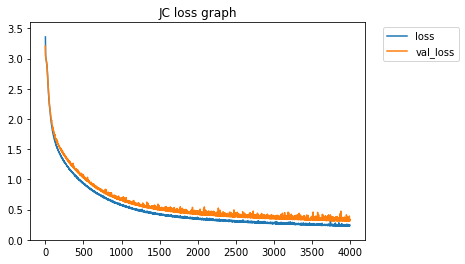

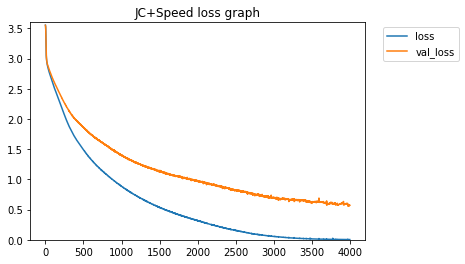

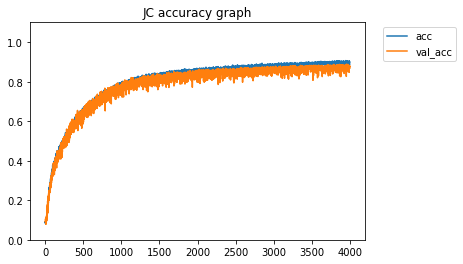

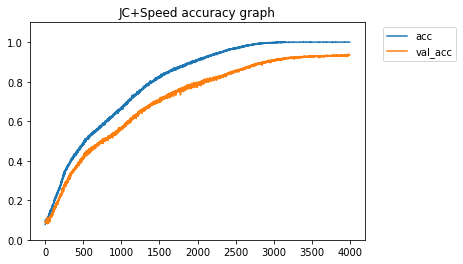

In [9]:
def plotting_history_loss(given_history, title='Loss graph'):
    fontP = FontProperties()
    plt.plot(given_history.history['loss'])
    plt.plot(given_history.history['val_loss'])
    plt.legend(['loss', 'val_loss'], prop=fontP, bbox_to_anchor=(1.04,1), loc="upper left")
    plt.title(title)
    plt.ylim(0,3.6)
    plt.show()
    
    
def plotting_history_acc(given_history, title='Accruacy graph'):
    fontP = FontProperties()
    plt.plot(given_history.history['acc'])
    plt.plot(given_history.history['val_acc'])
    plt.legend(['acc', 'val_acc'], prop=fontP, bbox_to_anchor=(1.04,1), loc="upper left")
    plt.title(title)
    plt.ylim(0,1.1)
    plt.show()

JC_loss = plotting_history_loss(position_history, 'JC loss graph')
JCS_loss = plotting_history_loss(all_feature_history, 'JC+Speed loss graph')
JC_1dcnn_acc = plotting_history_acc(position_history, 'JC accuracy graph')
JCS_1dcnn_acc = plotting_history_acc(all_feature_history, 'JC+Speed accuracy graph')

In [10]:
from sklearn.metrics import classification_report

# JC_training
print(classification_report(numpy.argmax(position_total_data[1][training_index], axis=1), numpy.argmax(model_position.predict(position_total_data[0][training_index]), axis=1)))
# JC_validation
print(classification_report(numpy.argmax(position_total_data[1][validation_index], axis=1), numpy.argmax(model_position.predict(position_total_data[0][validation_index]), axis=1)))

# JCS_training
print(classification_report(numpy.argmax(all_feature_total_data[1][training_index], axis=1), numpy.argmax(model_all_feature.predict(all_feature_total_data[0][training_index]), axis=1)))
# JCS_validation
print(classification_report(numpy.argmax(all_feature_total_data[1][validation_index], axis=1), numpy.argmax(model_all_feature.predict(all_feature_total_data[0][validation_index]), axis=1)))

              precision    recall  f1-score   support

          10       1.00      0.99      0.99        84
          11       1.00      1.00      1.00        72
          12       1.00      1.00      1.00        75
          13       0.99      1.00      1.00       104
          14       1.00      1.00      1.00        89
          15       1.00      1.00      1.00       102
          16       1.00      1.00      1.00        54
          17       1.00      0.97      0.99        71
          18       1.00      1.00      1.00        77
          19       1.00      0.99      0.99        72
          20       1.00      1.00      1.00        92
          21       1.00      1.00      1.00        96
          22       1.00      1.00      1.00        71
          23       1.00      1.00      1.00        71
          24       1.00      1.00      1.00        44
          25       1.00      1.00      1.00       101
          26       1.00      1.00      1.00        55
          27       1.00    

In [11]:
# JC model load
from keras.models import model_from_json 
json_file = open("model_position_4000_0217.json", "r")
loaded_model_json = json_file.read() 
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# JC model weight load 
model_position.load_weights("model_position_4000_0217.h5")
print("Loaded model from disk")

# JC evaluate
model_position.compile(loss='categorical_crossentropy', optimizer=Adam(0.0000045), metrics=['accuracy'])
t_score = model_position.evaluate(position_total_data[0][training_index], position_total_data[1][training_index],verbose=0)
v_score = model_position.evaluate(position_total_data[0][validation_index], position_total_data[1][validation_index],verbose=0)
m_score = model_position.evaluate(position_total_data[0], position_total_data[1],verbose=0)

print('JC training loss : ' + str(t_score[0]))
print('JC validation loss : ' + str(v_score[0]))
print("")
print('JC training accuracy : ' + str(t_score[1]))
print('JC validation accuracy : ' + str(v_score[1]))
print("")
print('JC total loss : ' + str(m_score[0]))
print('JC total accuracy : ' + str(m_score[1]))

Loaded model from disk
JC training loss : 0.24035881790849897
JC validation loss : 0.33767981822447063

JC training accuracy : 0.8982558137994712
JC validation accuracy : 0.8681377825618946

JC total loss : 0.34303748416758933
JC total accuracy : 0.877611474917245


In [12]:
# JCS model load
from keras.models import model_from_json 
json_file = open("model_all_feature_4000_0217.json", "r")
loaded_model_json = json_file.read() 
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# JCS model weight load 
model_all_feature.load_weights("model_all_feature_4000_0217.h5")
print("Loaded model from disk")

# evaluate
model_all_feature.compile(loss='categorical_crossentropy', optimizer=Adam(0.0000045), metrics=['accuracy'])
t_score = model_all_feature.evaluate(all_feature_total_data[0][training_index], all_feature_total_data[1][training_index],verbose=0)
v_score = model_all_feature.evaluate(all_feature_total_data[0][validation_index], all_feature_total_data[1][validation_index],verbose=0)
m_score = model_all_feature.evaluate(all_feature_total_data[0], all_feature_total_data[1],verbose=0)

print('JCS total training loss : ' + str(t_score[0]))
print('JCS total training accuracy : ' + str(t_score[1]))
print("")
print('JCS total validation loss : ' + str(v_score[0]))
print('JCS total validation accuracy : ' + str(v_score[1]))
print("")
print('JCS total loss : ' + str(m_score[0]))
print('JCS total accuracy : ' + str(m_score[1]))

Loaded model from disk
JCS total training loss : 0.003905876822413477
JCS total training accuracy : 1.0

JCS total validation loss : 0.5721537581959737
JCS total validation accuracy : 0.9359526372443487

JCS total loss : 0.30644002816089555
JCS total accuracy : 0.9657622739018088
